## Replicated clusters composition

In [2]:
import os,sys
import numpy as np
import pandas as pd
import pylab as plt

from analysis.CodingScoring import scoreTIPI, normTIPI, codeGender

src_dir = os.path.abspath(os.path.join(os.pardir,'personality-types-orig/src/analysis'))
sys.path[0] = src_dir

from factor_analysis import rotated_scaled_fa
# plt.style.use('dark_background')

In [6]:
# values from GMM ran on Pascal's dataset (factored and normed to self) at Nc = 15
rm = np.array([-0.95596341,  0.98410019,  0.53402122,  0.35746483,  0.36325226])
rm_cov = np.array([0.27209494, 0.34052784, 1.08619307, 0.54318497, 0.40111773])
rs = np.array([-1.01277321, -0.85952354, -1.09941738,  0.35830382,  0.3137447])
rs_cov = np.array([0.34060003, 0.1950959 , 0.46481228, 0.92310431, 0.42222254])

In [3]:
rm_gerlach = np.array([-0.70,0.52,0.23,0.62,0.78])
rm_gerlach_cov_est = np.array([0.69,0.55,0.70,0.61,0.72])

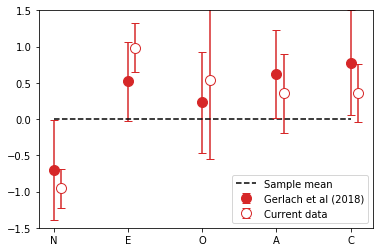

In [17]:
r = '#d62728'
g = '#2ca02c'
plt.errorbar(x=[0,1,2,3,4],y=rm_gerlach,yerr=rm_gerlach_cov_est, marker='o',LineStyle='none',
             color=r,markersize=10,capsize=4)
plt.errorbar(x=[0.1,1.1,2.1,3.1,4.1],y=rm,yerr=rm_cov,marker='o',color=r,
            LineStyle='none',markeredgecolor=r,markerfacecolor='w',markersize=10,capsize=4)
plt.ylim(-1.5,1.5)
plt.hlines(y=0,xmin=0,xmax=4,linestyles='dashed')
plt.xticks([0,1,2,3,4],['N','E','O','A','C'])
plt.legend(['Sample mean','Gerlach et al (2018)','Current data'])
plt.savefig('figRM.png')

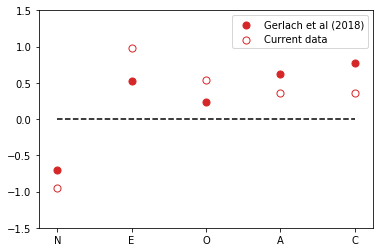

In [8]:
r = '#d62728'
plt.scatter(x=[0,1,2,3,4],y=rm_gerlach, marker='o',color=r,s=50)
plt.scatter(x=[0,1,2,3,4],y=rm,marker='o',color=r,
            edgecolors=r,facecolors='w',s=50)
plt.ylim(-1.5,1.5)
plt.hlines(y=0,xmin=0,xmax=4,linestyles='dashed')
plt.xticks([0,1,2,3,4],['N','E','O','A','C'])
plt.legend(['Gerlach et al (2018)','Current data'])
plt.savefig('figRM_noerr.png')

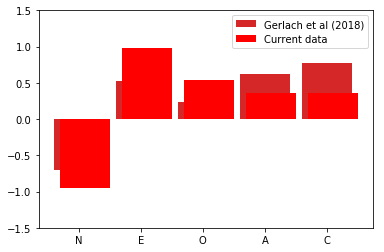

In [16]:
r = '#d62728'
plt.bar(x=[0,1,2,3,4],height=rm_gerlach,color=r)
plt.bar(x=[0.1,1.1,2.1,3.1,4.1],height=rm,color='r')
plt.ylim(-1.5,1.5)
# plt.hlines(y=0,xmin=0,xmax=4,linestyles='dashed')
plt.xticks([0,1,2,3,4],['N','E','O','A','C'])
plt.legend(['Gerlach et al (2018)','Current data'])

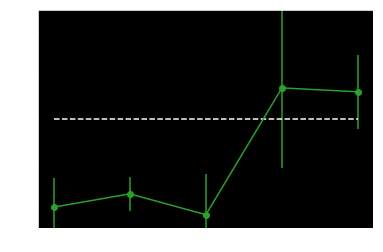

In [15]:
plt.errorbar(x=[0,1,2,3,4],y=rs_gerlach,yerr=rm_gerlach_cov_est, marker='o',LineStyle='none',
             color=r,markersize=10,capsize=4)
plt.errorbar(x=[0.1,1.1,2.1,3.1,4.1],y=rm,yerr=rm_cov,marker='o',color=r,
            LineStyle='none',markeredgecolor=r,markerfacecolor='w',markersize=10,capsize=4)
plt.ylim(-1.5,1.5)
plt.hlines(y=0,xmin=0,xmax=4,linestyles='dashed')
plt.xticks([0,1,2,3,4],['N','E','O','A','C'])
plt.legend(['Sample mean','Gerlach et al (2018)','Pascal data'])
# plt.savefig('figRM.png')

In [3]:
questions = pd.read_csv('data/External/dataHeadings.csv')
dataRaw = pd.read_csv('data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN


In [4]:
# accounts for 99%
dataRaw['GenderCode']=codeGender(dataRaw)

/Users/melissawessel/Documents/dev/python/Pascal/analysis/CodingScoring.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['GenderCode'][df['Gender'].isin(female)] = 1
/Users/melissawessel/Documents/dev/python/Pascal/analysis/CodingScoring.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['GenderCode'][df['Gender'].isin(male)] = 2


In [5]:
data = dataRaw
data.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText,GenderCode
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!,2
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!,1
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN,2
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...,2
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN,1


In [12]:
# data[['O','C','E','A','S']] = normTIPI(scoreTIPI(data))

In [6]:
TIPIcols = ['E+','A-','C+','S-','O+','E-','A+','C-','S+','O-']
df = data.dropna(subset=TIPIcols)

In [7]:
TIPI_fa = np.load('data/TIPI_fa_NEOAC.npy')

In [10]:
np.shape(TIPI_fa)

(16181, 5)

In [15]:
df.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText,GenderCode
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!,2
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!,1
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN,2
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...,2
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN,1


In [14]:
df[['N','E','O','A','C']] = ''

KeyError: "['N' 'E' 'O' 'A' 'C'] not in index"

In [29]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['End Date'] = pd.to_datetime(df['End Date'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df = df[df['Age']<100]

In [47]:
df['GenderCode'].value_counts()

1    10542
2     5294
0      281
Name: GenderCode, dtype: int64

In [51]:
df['Age'][df['Age']<10]

1096     0.0
1724     9.0
2191     8.0
3309     0.0
4006     6.0
4569     4.0
8607     4.0
11322    7.0
15268    2.0
Name: Age, dtype: float64

In [49]:
df['Age'].describe()

count    16117.000000
mean        38.862878
std         13.608647
min          0.000000
25%         29.000000
50%         37.000000
75%         48.000000
max         94.000000
Name: Age, dtype: float64

In [52]:
10542/15836

0.6656984086890629